In [47]:
!pip install pyvi
!pip install keras-preprocessing

In [48]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pickle
import nltk
from keras.layers import Dense, Embedding, LSTM, Dropout,SimpleRNN,LSTM,Bidirectional
from keras.models import Sequential
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import tensorflow as tf
from keras.models import model_from_json

In [49]:
from google.colab import files
uploaded = files.upload()

Saving data.xlsx to data.xlsx
Saving stop_words_Vietnamese.txt to stop_words_Vietnamese.txt


In [50]:
data = pd.read_excel('/content/data.xlsx')
X= data["question"].tolist()
Y= data["answer"]
print("thuộc tính điều kiện")
print(X)
print("thuộc tính cần dự đoán")
print(Y)

thuộc tính điều kiện
['Bật đèn lên.', 'Mở đèn đi.', 'Khởi động đèn.', 'Làm sáng lên.', 'Bật sáng ngay.', 'Bật đèn giúp tôi.', 'Hãy mở đèn.', 'Khởi chạy đèn.', 'Đèn sáng ngay.', 'Kích hoạt đèn.', 'Bật đèn nhanh lên.', 'Mở sáng đi nào.', 'Bật ánh sáng đi.', 'Làm sáng chỗ này lên.', 'Khởi động hệ thống đèn.', 'Kích hoạt ánh sáng.', 'Đèn đâu? Mở lên đi.', 'Bật nguồn sáng.', 'Khởi động nguồn đèn.', 'Bật tất cả đèn.', 'bạn ơi mở đèn.', 'Chiếu sáng cho tôi.', 'giúp tôi mở đèn.', 'Khởi động chế độ sáng.', 'Mở ánh sáng cho tôi.', 'Làm sáng căn phòng này.', 'Bật chế độ sáng.', 'Hãy chiếu sáng căn phòng.', 'Khởi động đèn sáng đi.', 'khởi động đèn sáng.', 'khởi động đèn cho căn phòng', 'mở đèn ngay lập tức.', 'Bật đèn và chiếu sáng.', 'mở cho tôi đèn', 'Hãy bật hệ thống sáng.', 'Kích hoạt đèn.', 'Khởi động nguồn sáng chính.', 'Bật ánh sáng tức thì.', 'Làm căn phòng sáng lên', 'Mở ánh sáng cho phòng.', 'Đèn sáng lên.', 'Bật nguồn sáng.', 'Bật ánh sáng phòng cho tớ.', 'Khởi động nguồn của đèn.', 'kh

In [51]:
le = preprocessing.LabelEncoder()
le.fit(Y)

list_label = list(le.classes_)

print(list_label)
print(len(list_label))

label = le.transform(Y)

onehot_encoder = OneHotEncoder(sparse_output=False)
label = label.reshape(len(label), 1)
onehot_encoded = onehot_encoder.fit_transform(label)
print(onehot_encoded)

['bật quạt', 'bật đèn', 'check thiết bị', 'hỏi giờ ngày', 'hỏi nhiệt độ phòng', 'hỏi thời tiết', 'hỏi điện năng', 'mở nhạc', 'mở rèm', 'nhắc nhở', 'tắt quạt', 'tắt đèn', 'về nhà', 'đi vắng', 'đóng rèm']
15
[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [52]:
def tienxuly(document):
    document = ViTokenizer.tokenize(document)
    document = document.lower()
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [53]:
for i in range(0,len(X)):
  X[i] = tienxuly(X[i])

for item in X:
    print(item)

bật đèn lên
mở đèn đi
khởi_động đèn
làm sáng lên
bật sáng ngay
bật đèn giúp tôi
hãy mở đèn
khởi chạy đèn
đèn sáng ngay
kích_hoạt đèn
bật đèn nhanh lên
mở sáng đi nào
bật ánh_sáng đi
làm sáng chỗ này lên
khởi_động hệ_thống đèn
kích_hoạt ánh_sáng
đèn đâu mở lên đi
bật nguồn sáng
khởi_động nguồn đèn
bật tất_cả đèn
bạn ơi mở đèn
chiếu sáng cho tôi
giúp tôi mở đèn
khởi_động chế_độ sáng
mở ánh_sáng cho tôi
làm sáng căn phòng này
bật chế_độ sáng
hãy chiếu sáng căn phòng
khởi_động đèn sáng đi
khởi_động đèn sáng
khởi_động đèn cho căn phòng
mở đèn ngay lập_tức
bật_đèn và chiếu sáng
mở cho tôi đèn
hãy bật hệ_thống sáng
kích_hoạt đèn
khởi_động nguồn sáng chính
bật ánh_sáng tức_thì
làm căn phòng sáng lên
mở ánh_sáng cho phòng
đèn sáng lên
bật nguồn sáng
bật ánh_sáng phòng cho tớ
khởi_động nguồn của đèn
khởi_động đèn nhé
làm căn phòng tràn_ngập ánh_sáng
chiếu sáng căn phòng cho tôi
đèn sáng nhanh nhất có_thể
kích_hoạt bóng đèn
bật hệ_thống đèn
mở chế_độ sáng
phòng tối quá
làm phòng sáng lên
tôi muốn

<Axes: xlabel='Samples', ylabel='Counts'>

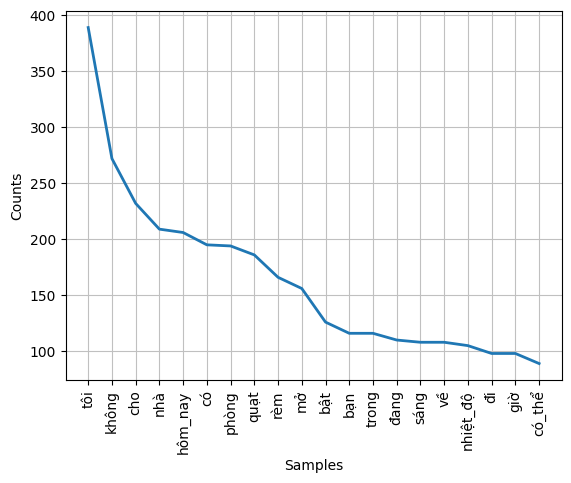

In [54]:
tokens = []

for i in range(0,len(X)):
  for j in X[i].split():
    tokens.append(j)

freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

In [56]:
#stopwords vietnames được lấy nguồn từ https://xltiengviet.fandom.com/wiki/Danh_s%C3%A1ch_stop_word

stopwords_file = open("stop_words_Vietnamese.txt", "r")
content = stopwords_file.read()
stopwords_VN = content.splitlines()
stopwords_file.close()

#stopword trong documents
stopword =['buổi']

stopwords = stopwords_VN + stopword

def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopwords:
            words.append(word)
    return ' '.join(words)

for i in range(0,len(X)):
  X[i]= remove_stopwords(X[i])

In [57]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
text_to_sequence = tokenizer.texts_to_sequences(X)

In [58]:
for i in range(5):
  print("\nMã hóa từ thứ: ",i)
  print("Từ gốc               : ",X[i] )
  print("Mã hóa thành các chuỗi số : ", text_to_sequence[i])


Mã hóa từ thứ:  0
Từ gốc               :  bật đèn
Mã hóa thành các chuỗi số :  [12, 16]

Mã hóa từ thứ:  1
Từ gốc               :  mở đèn đi
Mã hóa thành các chuỗi số :  [10, 16, 20]

Mã hóa từ thứ:  2
Từ gốc               :  khởi_động đèn
Mã hóa thành các chuỗi số :  [43, 27, 16]

Mã hóa từ thứ:  3
Từ gốc               :  làm sáng
Mã hóa thành các chuỗi số :  [29, 9]

Mã hóa từ thứ:  4
Từ gốc               :  bật sáng
Mã hóa thành các chuỗi số :  [12, 9]


In [59]:
max_length_sequence = max([len(i) for i in text_to_sequence])

padded_zeros_sequence = pad_sequences(text_to_sequence, maxlen=max_length_sequence,
                                    padding = "pre")
padded_zeros_sequence

array([[  0,   0,   0, ...,   0,  12,  16],
       [  0,   0,   0, ...,  10,  16,  20],
       [  0,   0,   0, ...,  43,  27,  16],
       ...,
       [  0,   0,   0, ...,  37,  26,  25],
       [  0,   0,   0, ...,  25,  21,  19],
       [  0,   0,   0, ...,   3, 219,  12]], dtype=int32)

In [60]:
# Kiểm tra độ dài của X và onehot_encoded
print("Length of X:", len(X))
print("Length of onehot_encoded:", len(onehot_encoded))


Length of X: 1500
Length of onehot_encoded: 1500


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(padded_zeros_sequence, onehot_encoded, test_size=0.1, random_state=0)

In [62]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
TOT_SIZE = len(tokenizer.word_index)+1

In [63]:
def RNN_model():
    model = Sequential()
    model.add(Embedding(input_dim=TOT_SIZE,output_dim= 16, input_length=max_length_sequence))
    model.add(SimpleRNN(64))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(15,activation='softmax'))
    return model

RNN_model = RNN_model()
RNN_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
RNN_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [64]:
history_RNN= RNN_model.fit(X_train, Y_train, epochs = 30, validation_split=0.1, batch_size=8,callbacks=callback)

Epoch 1/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1291 - loss: 2.6350 - val_accuracy: 0.2963 - val_loss: 2.0737
Epoch 2/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5020 - loss: 1.6497 - val_accuracy: 0.5926 - val_loss: 1.1689
Epoch 3/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7702 - loss: 0.8204 - val_accuracy: 0.7778 - val_loss: 0.7677
Epoch 4/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8802 - loss: 0.4639 - val_accuracy: 0.8667 - val_loss: 0.5007
Epoch 5/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9092 - loss: 0.2975 - val_accuracy: 0.8370 - val_loss: 0.5641
Epoch 6/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9259 - loss: 0.2195 - val_accuracy: 0.8741 - val_loss: 0.4985
Epoch 7/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9477 - loss: 0.1752 - val_accuracy: 0.8370 - val_loss: 0.5843
Epoch 8/30
152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9518 - loss: 0.1654 - val_accuracy: 0.

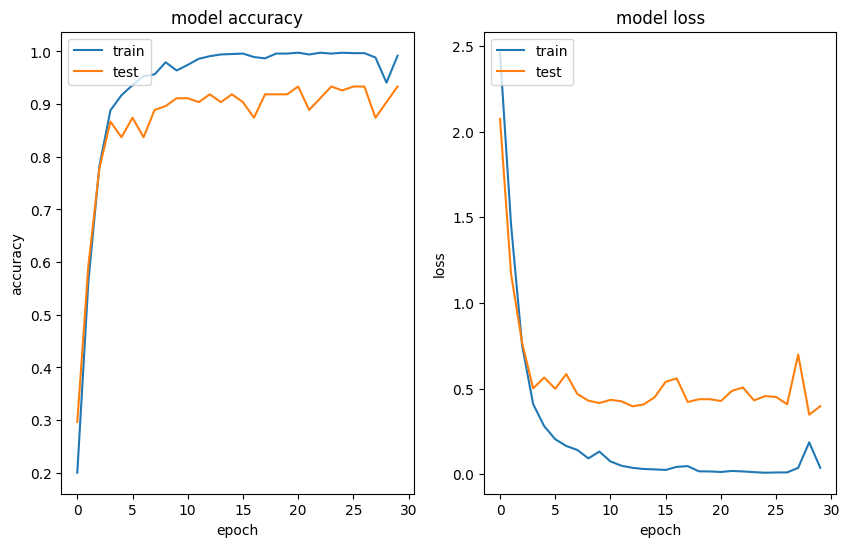

In [65]:
#show plot
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_RNN.history['accuracy'])
plt.plot(history_RNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
y_hat = history_RNN.model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(Y_test, axis=1)

# Tính accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)
# Tính precision tp / (tp + fp)
precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)
# Tính recall: tp / (tp + fn)
recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)
# Tính f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Accuracy: 0.900000
Precision: 0.923193
Recall: 0.912963
F1 score: 0.914350


In [67]:
def LSTM_model():
    model = Sequential()
    model.add(Embedding(input_dim=TOT_SIZE,output_dim= 256, input_length=max_length_sequence))
    model.add(LSTM(128))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(15,activation='softmax'))
    return model

LSTM_model = LSTM_model()
LSTM_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
LSTM_model.summary()

history_LSTM= LSTM_model.fit(X_train, Y_train, epochs = 30, validation_split=0.1, batch_size=16,callbacks=callback)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.1895 - loss: 2.5386 - val_accuracy: 0.5852 - val_loss: 1.2858
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.7445 - loss: 0.8940 - val_accuracy: 0.8519 - val_loss: 0.5375
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9351 - loss: 0.2682 - val_accuracy: 0.8963 - val_loss: 0.4140
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.9401 - loss: 0.1583 - val_accuracy: 0.9037 - val_loss: 0.3588
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.9798 - loss: 0.0745 - val_accuracy: 0.8815 - val_loss: 0.4564
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9833 - loss: 0.0511 - val_accuracy: 0.9333 - val_loss: 0.3199
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9924 - loss: 0.0345 - val_accuracy: 0.9111 - val_loss: 0.3219
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9926 - loss: 0.0287 - val_accuracy: 0.9185 - v

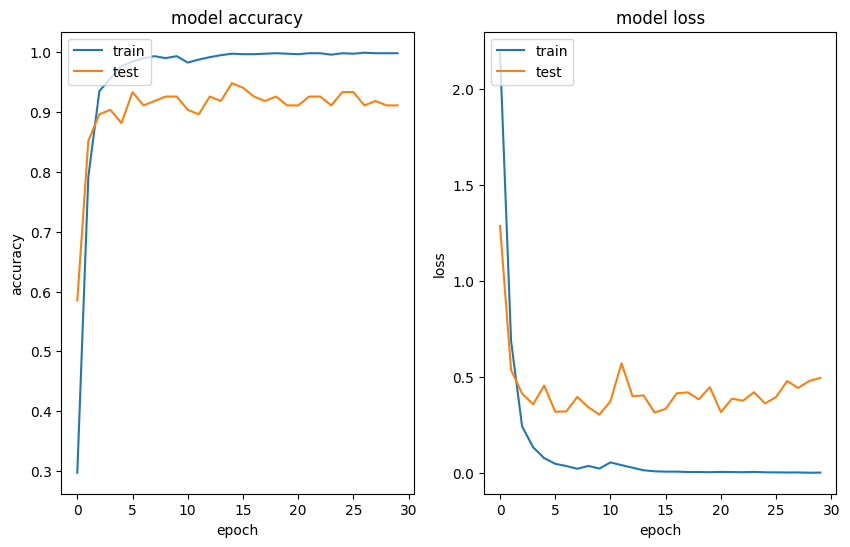

In [68]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_LSTM.history['accuracy'])
plt.plot(history_LSTM.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
y_hat = history_LSTM.model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(Y_test, axis=1)

accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)

recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)

f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
Accuracy: 0.900000
Precision: 0.922164
Recall: 0.918148
F1 score: 0.917649


In [87]:
def Bidirectional_model():
    model = Sequential()
    model.add(Embedding(input_dim=TOT_SIZE,output_dim= 512, input_length=max_length_sequence))
    model.add(Bidirectional(LSTM(256)))
    model.add(Dense(128,activation='relu'))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(15,activation='softmax'))
    return model

Bidirectional_model = Bidirectional_model()
Bidirectional_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
Bidirectional_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_10 (Bidirectional)     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_55 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_56 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_57 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [88]:
history_Bidirectional= Bidirectional_model.fit(X_train, Y_train, epochs = 30, validation_split=0.1, batch_size=16,callbacks=callback)

Epoch 1/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 19s 176ms/step - accuracy: 0.1259 - loss: 2.5682 - val_accuracy: 0.3778 - val_loss: 1.7721
Epoch 2/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 170ms/step - accuracy: 0.5365 - loss: 1.2910 - val_accuracy: 0.6667 - val_loss: 1.1234
Epoch 3/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.7831 - loss: 0.6317 - val_accuracy: 0.8074 - val_loss: 0.7715
Epoch 4/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 173ms/step - accuracy: 0.8861 - loss: 0.3469 - val_accuracy: 0.8296 - val_loss: 0.6489
Epoch 5/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 169ms/step - accuracy: 0.9282 - loss: 0.1992 - val_accuracy: 0.8815 - val_loss: 0.6113
Epoch 6/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.9621 - loss: 0.1312 - val_accuracy: 0.9037 - val_loss: 0.5800
Epoch 7/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 167ms/step - accuracy: 0.9790 - loss: 0.0806 - val_accuracy: 0.9037 - val_loss: 0.5169
Epoch 8/30
76/76 ━━━━━━━━━━━━━━━━━━━━ 13s 171ms/step - accuracy: 0.9783 - loss: 0.0655 - val_accu

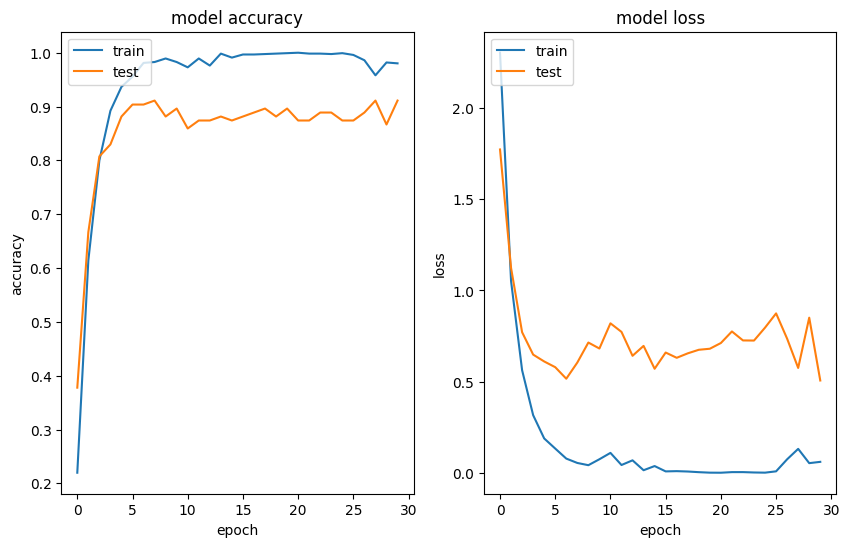

In [90]:
plt.figure(figsize=(10,6))
plt.subplot(121)
plt.plot(history_Bidirectional.history['accuracy'])
plt.plot(history_Bidirectional.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(122)
plt.plot(history_Bidirectional.history['loss'])
plt.plot(history_Bidirectional.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [91]:
y_hat = history_Bidirectional.model.predict(X_test)
y_pred = np.argmax(y_hat, axis=1)
y_test_label =  np.argmax(Y_test, axis=1)

accuracy = accuracy_score(y_test_label, y_pred)
print('Accuracy: %f' % accuracy)

precision = precision_score(y_test_label, y_pred, average='macro')
print('Precision: %f' % precision)

recall = recall_score(y_test_label, y_pred, average='macro')
print('Recall: %f' % recall)

f1 = f1_score(y_test_label, y_pred, average='macro')
print('F1 score: %f' % f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step
Accuracy: 0.900000
Precision: 0.928473
Recall: 0.920370
F1 score: 0.922854


In [92]:
print(X_test[0].shape)

(12,)


In [93]:
le.inverse_transform(np.argmax(history_Bidirectional.model.predict(X_test[0].reshape(1,12)), axis=1))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


'mở rèm'

In [94]:
pickle.dump(le, open('decode_label.pkl', 'wb'))
pickle.dump(tokenizer, open("decode_tokenizer.pkl", "wb"))

In [95]:
pickle.dump(stopwords, open("stopwords.pkl", "wb"))
pickle.dump(onehot_encoded,open("one_hot_label.pkl", "wb"))

In [96]:
pickle.dump(history_RNN, open("RNN_model.pkl", "wb"))
pickle.dump(history_LSTM, open("LSTM_model.pkl", "wb"))
pickle.dump(history_Bidirectional, open("Bi_model.pkl", "wb"))

In [97]:
history_RNN.model.save_weights("RNN_model.weights.h5")
history_LSTM.model.save_weights("LSTM_model.weights.h5")
history_Bidirectional.model.save_weights("BI_model.weights.h5")

In [98]:
model_json1 = history_RNN.model.to_json()
with open("RNN_model.json", "w") as json_file:
    json_file.write(model_json1)

In [99]:
model_json2 = history_LSTM.model.to_json()
with open("LSTM_model.json", "w") as json_file:
    json_file.write(model_json2)

In [100]:
model_json3 = history_Bidirectional.model.to_json()
with open("BI_model.json", "w") as json_file:
    json_file.write(model_json3)

In [102]:
from google.colab import files
files.download("Bi_model.pkl")  # Tải file đã lưu


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>